# Explore and Visualize the Data

In [98]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [99]:
from pprint import pprint

In [100]:
pwd

'/home/jovyan/madelon/ipynb'

In [101]:
madelon_test_10 = pd.read_pickle('../assets/madelon_test_10.p')
madelon_train_10 = pd.read_pickle('../assets/madelon_train_10.p')
madelon_train_label10 = pd.read_pickle('../assets/madelon_train_label10.p')
madelon_valid_10= pd.read_pickle('../assets/madelon_valid10.p')

In [102]:
cook_sample = pd.read_pickle('../assets/cook_sample.p')

### Examine and 'clean' the Data

### Madelon Dataset

In [103]:
madelon_test_10.shape

(180, 501)

In [104]:
madelon_train_10.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
187,492,457,516,501,506,483,540,477,496,471,...,489,475,459,700,488,535,472,499,537,535
142,487,513,494,474,433,482,495,481,485,485,...,441,474,463,517,497,552,474,451,456,484
846,485,471,483,483,576,477,512,478,512,472,...,474,482,485,474,475,485,480,486,472,465
1928,476,461,501,497,479,481,529,477,479,486,...,486,484,497,487,495,536,484,499,481,469
1347,476,475,520,490,439,482,402,475,479,472,...,496,476,490,683,465,487,466,475,502,478


In [105]:
def drop_last_column_permanent (dataframe):
    last_column_index = dataframe.shape[1]-1
    df = dataframe.drop(last_column_index, axis=1, inplace=True)
    return df

In [106]:
madelon_df_list = [madelon_test_10, madelon_train_10, madelon_valid_10]

In [107]:
drop_last_col_dfs = []

for dataframe in madelon_df_list:
    drop_last_col_dfs.append(drop_last_column(dataframe))

In [108]:
madelon_cleaned = dict(zip(range(len(drop_last_col_dfs)), drop_last_col_dfs))

In [109]:
madelon_test_10 = madelon_cleaned[0]
madelon_train_10 = madelon_cleaned[1]
madelon_valid_10 = madelon_cleaned[2]

### Cook Sample Data Set

This was taken from Josh Cook's database where Josh Cook used sklearn's make_classification to generate 220,000 samples and 1,000 features. It is unknown how many features are informative, redundant, or noise.

In [110]:
cook_sample.shape

(440, 1002)

In [111]:
# cook_sample.sample(5)

In [112]:
# extract the target from the sample
# extract the id from the sample

cook_target = cook_sample.iloc[:, -1]
cook_features = cook_sample.iloc[:, 1:-1]

In [113]:
display(cook_target.shape)
display(cook_features.shape)

(440,)

(440, 1000)

### Explore and Visualize Some Features

- I'm only going to visualize and explore the features from both the Madelon dataset and from the Cook sample. The Madelon data set has 500 features, and the Cook sample has 1000 features (excluding the target and the id number). 
- Since there are 500 features in the Madelon dataset and 1,000 features in the Cook dataset, I randomly sampled 10% from each dataset to visualize instead of visualizing all 500 and 1,000 from each of the respective datasets.

#### Sample the datasets

In [114]:
madelon_sampled_cols = madelon_train_10.sample(50, axis=1)
madelon_sampled_cols.sample(5)

,335,109,105,326,334,198,135,106,183,421,...,310,235,314,205,408,206,316,353,391,26
974,490,495,590,457,478,476,507,468,471,474,...,447,551,489,475,469,450,478,474,452,496
538,486,480,585,474,504,474,491,455,466,494,...,479,520,475,476,472,468,480,470,475,497
641,490,477,592,526,401,475,568,455,478,471,...,486,485,484,474,462,478,471,476,481,459
254,464,502,643,451,452,477,536,502,495,486,...,496,492,473,475,537,436,471,478,493,465
286,453,479,499,528,499,476,521,458,485,476,...,451,482,478,476,479,457,500,478,449,478


In [115]:
cook_sampled_cols = cook_features.sample(100, axis=1)
cook_sampled_cols.sample(5)

,feat_380,feat_780,feat_717,feat_312,feat_220,feat_509,feat_600,feat_350,feat_377,feat_811,...,feat_432,feat_384,feat_949,feat_624,feat_465,feat_291,feat_745,feat_153,feat_394,feat_343
431,-0.305839,-0.100919,0.514040,1.616904,0.045674,-0.609309,-0.610519,0.507791,1.125065,0.671888,...,-1.169740,-2.590601,0.352786,0.474047,-0.023200,0.471596,-0.060823,0.753611,0.605195,-0.554927
243,0.211412,0.820908,0.838409,-0.091866,-0.380034,-0.750632,-0.994075,0.282384,-0.616993,-0.361234,...,0.544073,0.283466,-0.593418,-0.923825,-0.085557,-0.435829,-0.264764,0.841032,-0.064425,0.145522
108,-0.996764,-0.480682,-1.755341,0.027555,1.459751,-0.104426,0.142950,-0.717412,-0.061659,-0.103615,...,-0.074102,0.135367,0.236704,0.648255,-0.758715,-2.052292,-0.620972,2.325602,-1.361798,-0.537568
401,-0.079735,-0.496700,0.299473,0.940674,-0.965900,1.402916,0.129139,-0.563583,0.534782,-0.758496,...,-1.065715,0.700001,-0.030067,-0.047237,-0.110918,-0.049006,0.251049,0.278619,0.495127,0.248291
60,-0.278795,0.755346,0.741761,-2.071870,0.589288,0.594355,-1.081509,-2.130944,-1.936412,0.255176,...,-0.378900,-0.108910,-0.582222,-1.429520,1.040905,-0.715575,-0.043906,0.609056,-0.401356,1.057276


#### Visualize the columns

In [116]:
def distplot_df_cols (df):
    '''
    cannot handle a dataframe with more than 100 columns
    '''
    fig = plt.figure(1, figsize=(20,40))
    
    for i in range(len(df.columns)):
        fig.add_subplot(20,5,i+1)
        sns.distplot(df.iloc[i])
        plt.axvline(df[df.columns[i]].mean(), c='red')
        plt.axvline(df[df.columns[i]].median(), c='black')

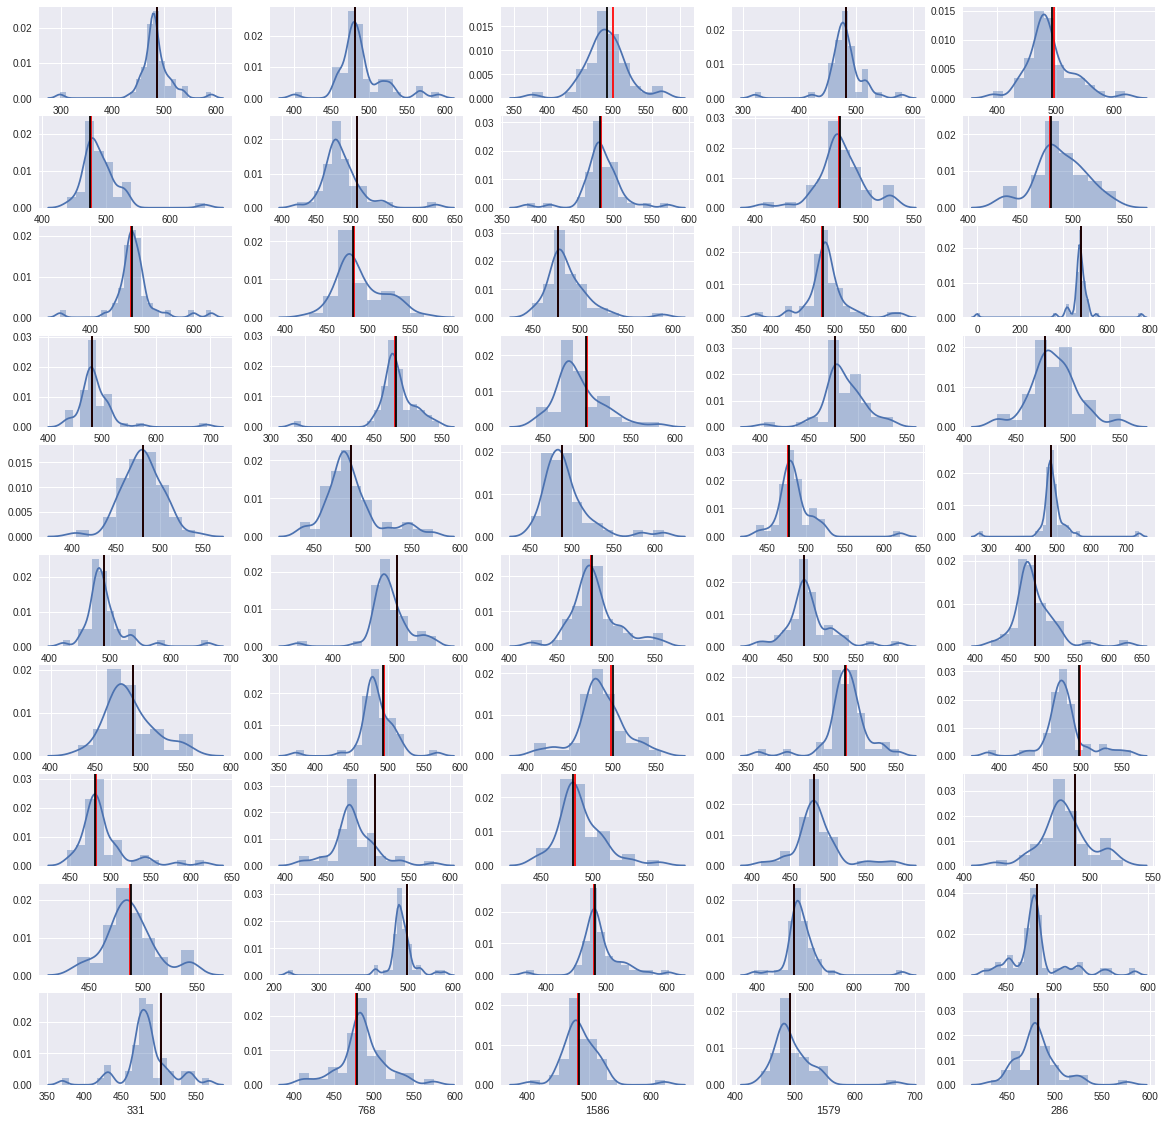

In [117]:
distplot_df_cols(madelon_sampled_cols)

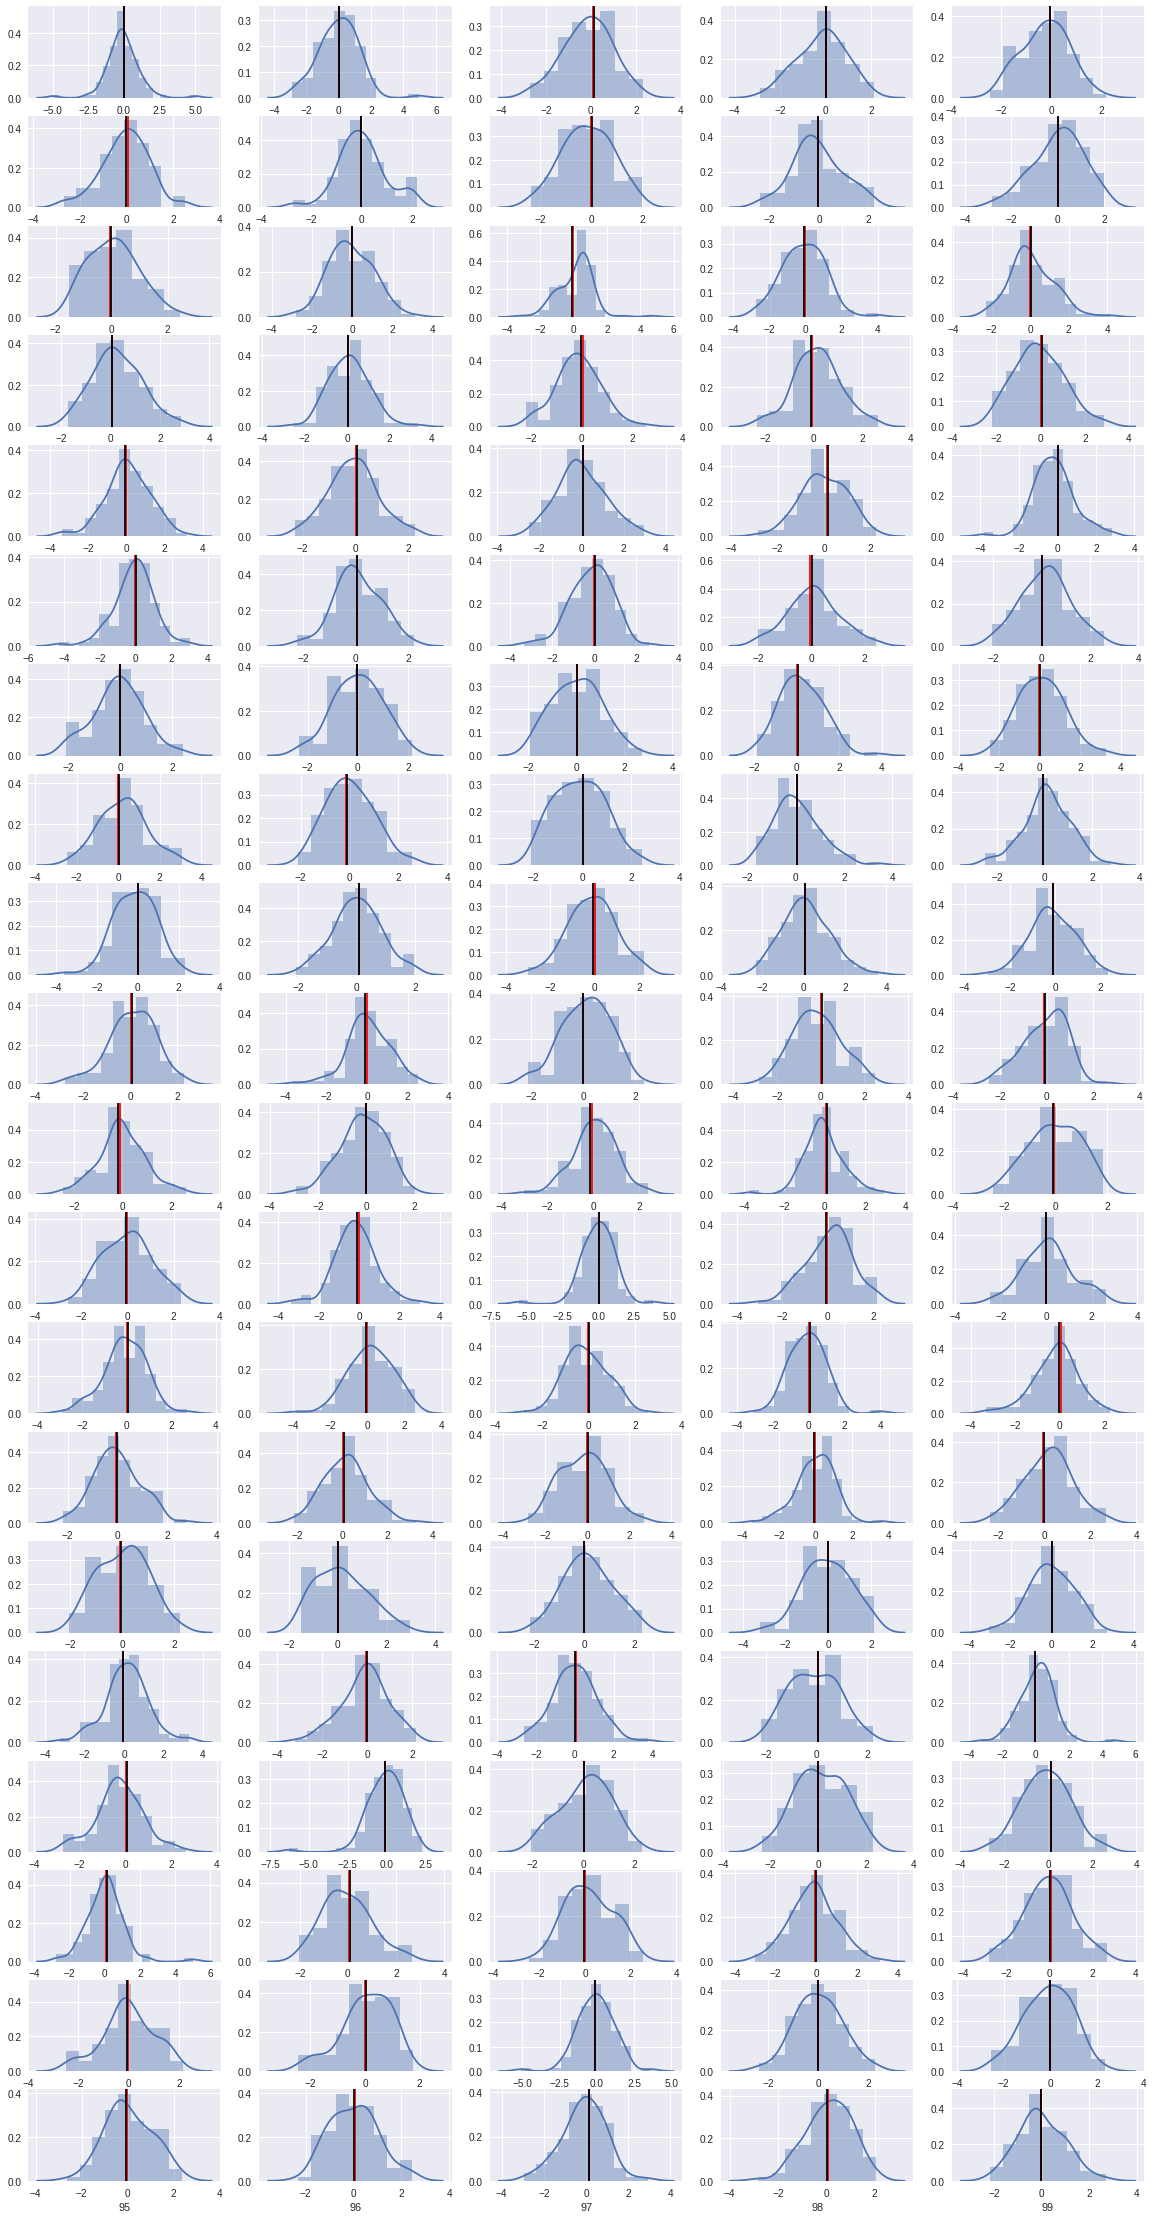

In [118]:
distplot_df_cols(cook_sampled_cols)

#### Observations - BOTH Madelon Dataset and Cook's Make Classification Dataset
* There are features that are skewed (where the mean and the median are not the same)
* There are features that are have bimodal distribution
* There appear to be featuers with outliers as well

In [ ]:
fig = plt.figure(1, figsize=(20,40))

for i in range(0, len(madelon_train_10.columns)-2, 2):
    fig.add_subplot(20,5,i+1)
    plt.scatter(madelon_train_10.iloc[:, i], madelon_train_10.iloc[:, i+1], c=madelon_train_label10, cmap='rainbow')
    plt.xlabel('madelon feature {}'.format(madelon_train_10.columns[i]))
    plt.ylabel('madelon feature {}'.format(madelon_train_10.columns[i+1]))
    plt.show()
   

### Unsupervised Learning on the Training Data (without Labels)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def calculate_R2_score (data, feature):
    temp_features = data
    temp_target = data[feature]
    
    